In [1]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_data_dir = "/content/drive/MyDrive/datasets/birds/train"
test_data_dir = "/content/drive/MyDrive/datasets/birds/test"

In [6]:
train_data_no_augmentation = image_dataset_from_directory(train_data_dir, image_size=(224,224), batch_size=16)
test_data = image_dataset_from_directory(test_data_dir, image_size=(224,224), batch_size=16)

Found 1310 files belonging to 10 classes.
Found 50 files belonging to 10 classes.


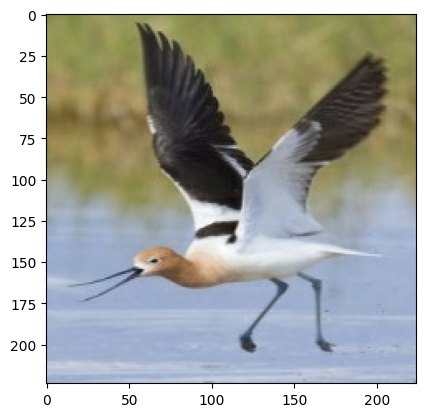

In [7]:
plt.imshow(list(train_data_no_augmentation)[0][0][0].numpy().astype("uint8"))

In [8]:
classes = train_data_no_augmentation.class_names
classes


['ABBOTTS BABBLER',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALEXANDRINE PARAKEET',
 'AMERICAN AVOCET',
 'AMERICAN COOT']

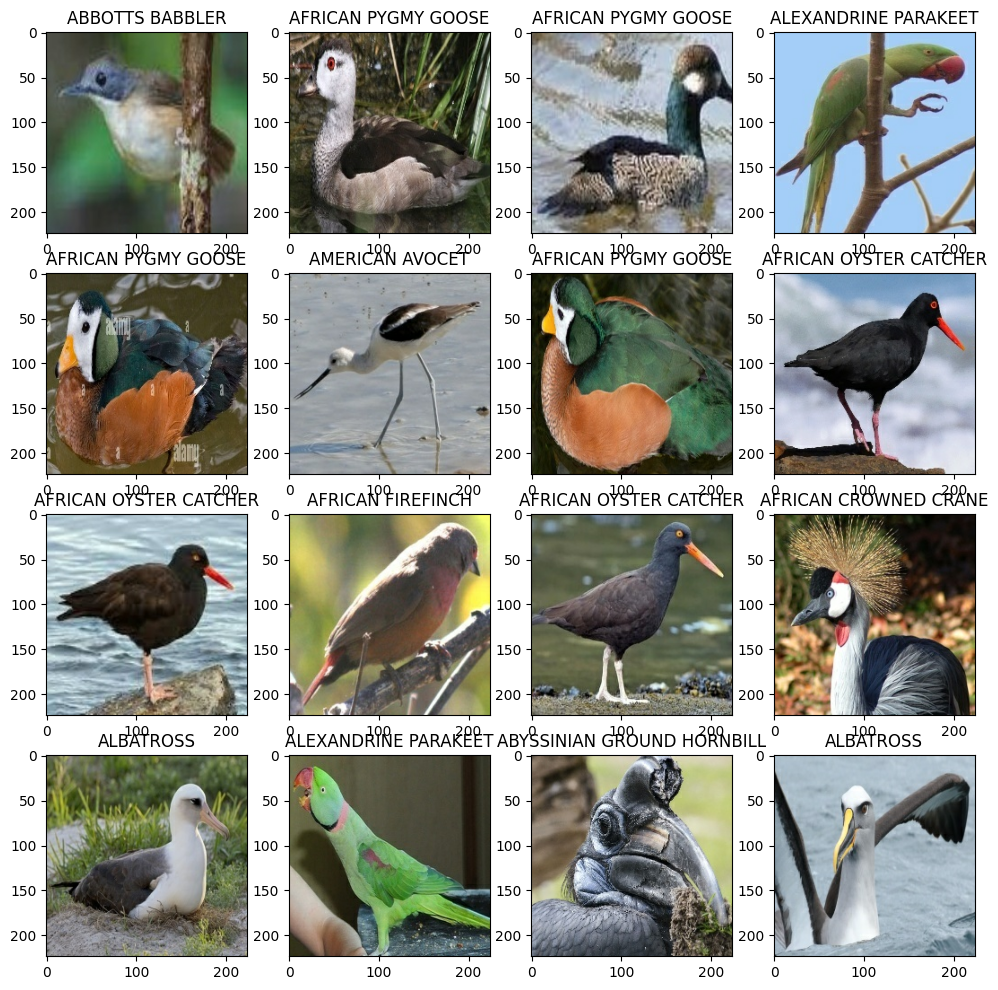

In [9]:
plt.figure(figsize=(12,12))
for image, label in train_data_no_augmentation.take(1):

    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.title(classes[label[i]])
        plt.imshow(image[i].numpy().astype("uint8"))

In [10]:
model_without_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((224,224,3)),

    tf.keras.layers.Conv2D(32, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),   #112x112x32

    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),   #56x56x64

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")

])

In [11]:
model_without_augmentation.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [12]:
model_without_augmentation.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [13]:
with tf.device('/GPU:0'):
    model_without_augmentation.fit(train_data_no_augmentation, epochs=10)

Epoch 1/10
82/82 [==============================] - 12s 80ms/step - loss: 158.3153 - accuracy: 0.2397
Epoch 2/10
82/82 [==============================] - 6s 63ms/step - loss: 1.0454 - accuracy: 0.6641
Epoch 3/10
82/82 [==============================] - 5s 51ms/step - loss: 0.2756 - accuracy: 0.9244
Epoch 4/10
82/82 [==============================] - 5s 60ms/step - loss: 0.0667 - accuracy: 0.9809
Epoch 5/10
82/82 [==============================] - 6s 61ms/step - loss: 0.1866 - accuracy: 0.9641
Epoch 6/10
82/82 [==============================] - 5s 56ms/step - loss: 0.0611 - accuracy: 0.9901
Epoch 7/10
82/82 [==============================] - 6s 67ms/step - loss: 0.0616 - accuracy: 0.9901
Epoch 8/10
82/82 [==============================] - 5s 51ms/step - loss: 0.0904 - accuracy: 0.9771
Epoch 9/10
82/82 [==============================] - 5s 63ms/step - loss: 0.0710 - accuracy: 0.9847
Epoch 10/10
82/82 [==============================] - 5s 55ms/step - loss: 0.0353 - accuracy: 0.9908


In [14]:
model_without_augmentation.evaluate(test_data)

4/4 [==============================] - 8s 68ms/step - loss: 10.7090 - accuracy: 0.4600


[10.70904541015625, 0.46000000834465027]

In [45]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.2,
                                    rotation_range=0.2,
                                    height_shift_range=0.2,
                                    width_shift_range=0.2,
                                    fill_mode="nearest",
                                    brightness_range=(0.2,0.8),
                                    horizontal_flip=True,
                                    vertical_flip=True
                                   )

In [46]:
train_data_augmentation = data_generator.flow_from_directory(train_data_dir, target_size=(224,224), class_mode="sparse")

Found 1310 images belonging to 10 classes.


In [47]:
test_data = image_dataset_from_directory(test_data_dir, image_size=(224,224))

Found 50 files belonging to 10 classes.


In [57]:
for rasm,label in test_data.take(1):
    for i in range(1):
        rasm = rasm[i].numpy().astype("uint8")

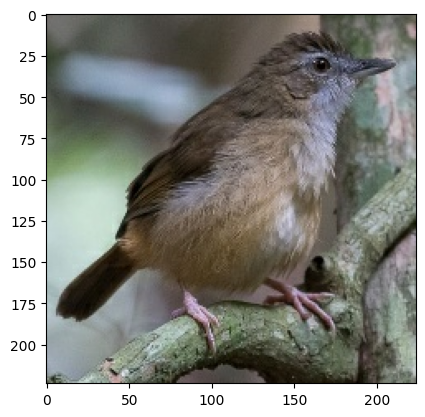

In [58]:
plt.imshow(rasm)

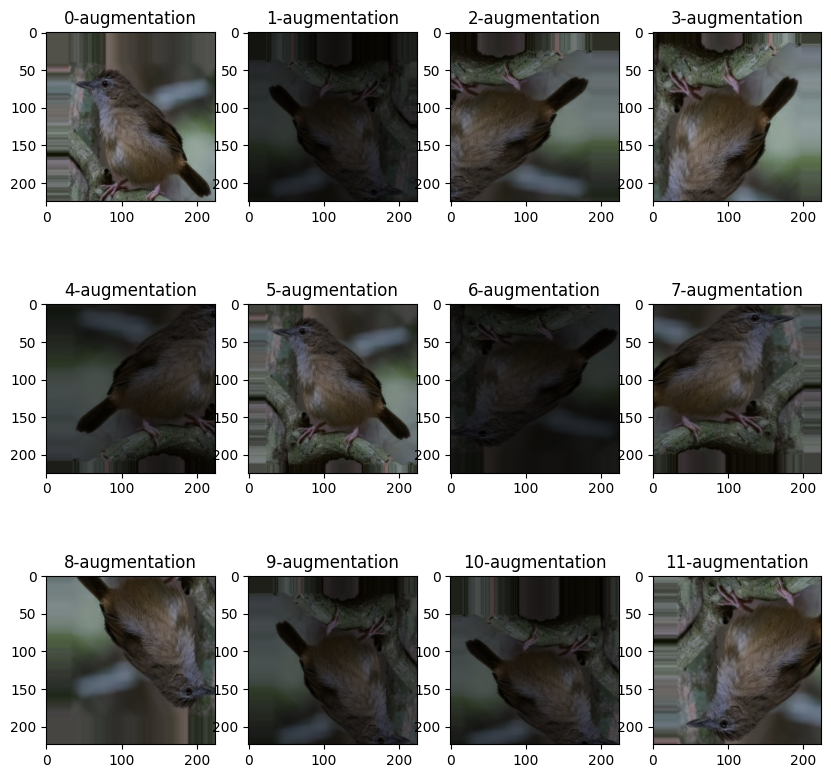

In [59]:
plt.figure(figsize=(10,10))
for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(next(data_generator.flow(np.expand_dims(rasm,0)))[0])
    plt.title(f"{i}-augmentation")